In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2024-04-11 13:38:47--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  36.3MB/s    in 6.1s    

2024-04-11 13:38:53 (31.6 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2024-04-11 13:38:53--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-tes

In [2]:
import zipfile

local_zip = "./rps.zip"
zip_ref = zipfile.ZipFile( local_zip, "r")
zip_ref.extractall( "/tmp/rps-train")
zip_ref.close()

local_zip = "./rps-test-set.zip"
zip_ref = zipfile.ZipFile( local_zip, "r")
zip_ref.extractall( "/tmp/rps-test")
zip_ref.close()

In [3]:
import os

base_dir = "/tmp/rps-train/rps"

rock_dir = os.path.join( base_dir, "rock")
paper_dir = os.path.join( base_dir, "paper")
scissors_dir = os.path.join( base_dir, "scissors")

print( f"Total Training Rock Images: { len( os.listdir( rock_dir))}")
print( f"Total Training Paper Images: { len( os.listdir( paper_dir))}")
print( f"Total Training Scissors Images: { len( os.listdir( scissors_dir))}")

rock_files = os.listdir( rock_dir)
print( rock_files[ :10])

paper_files = os.listdir( paper_dir)
print( paper_files[ :10])

scissors_files = os.listdir( scissors_dir)
print( scissors_files[ :10])

Total Training Rock Images: 840
Total Training Paper Images: 840
Total Training Scissors Images: 840
['rock01-002.png', 'rock05ck01-016.png', 'rock05ck01-098.png', 'rock04-054.png', 'rock03-006.png', 'rock07-k03-001.png', 'rock04-005.png', 'rock06ck02-091.png', 'rock03-059.png', 'rock05ck01-006.png']
['paper02-039.png', 'paper01-055.png', 'paper03-096.png', 'paper05-019.png', 'paper07-015.png', 'paper07-014.png', 'paper06-109.png', 'paper06-078.png', 'paper06-029.png', 'paper05-077.png']
['scissors01-006.png', 'scissors01-108.png', 'scissors03-070.png', 'scissors04-086.png', 'scissors03-069.png', 'scissors03-111.png', 'scissors01-034.png', 'scissors01-041.png', 'scissors01-014.png', 'testscissors02-007.png']


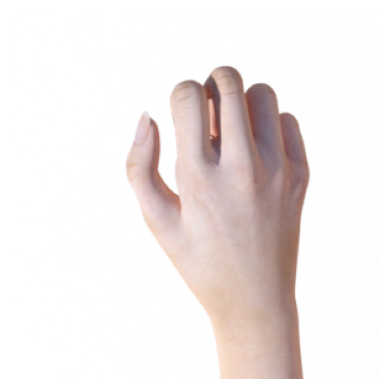

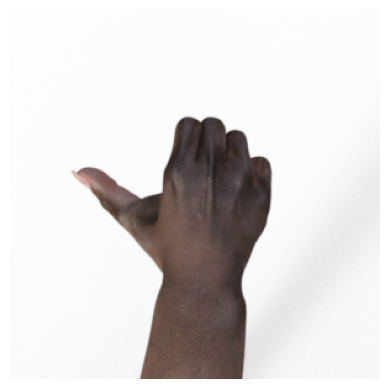

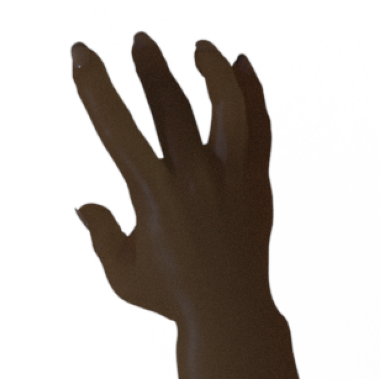

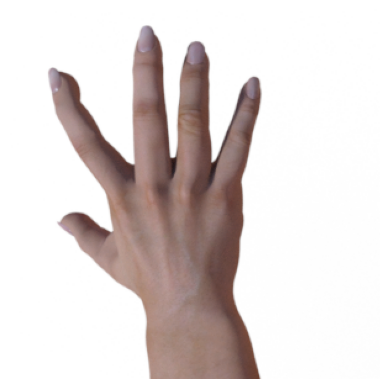

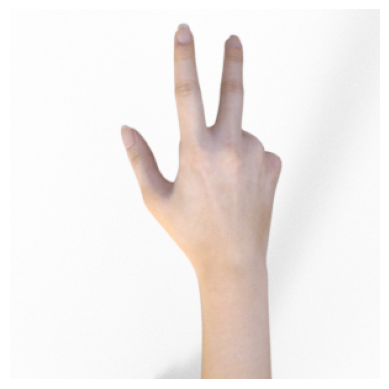

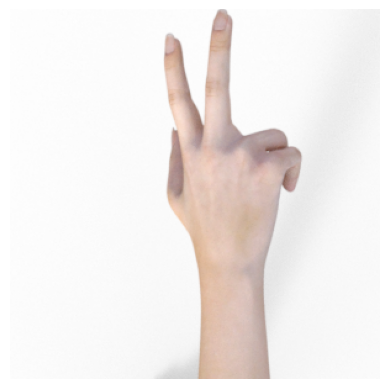

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [ os.path.join( rock_dir, fname) for fname in rock_files[ pic_index - 2:pic_index]]
next_paper = [ os.path.join( paper_dir, fname) for fname in paper_files[ pic_index - 2:pic_index]]
next_scissors = [ os.path.join( scissors_dir, fname) for fname in scissors_files[ pic_index - 2:pic_index]]

for i, img_path in enumerate( next_rock + next_paper + next_scissors):
    img = mpimg.imread( img_path)
    plt.imshow( img)
    plt.axis( "Off")
    plt.show()

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential( [
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu", input_shape=( 150, 150, 3)),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 128, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 128, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout( 0.5),
    tf.keras.layers.Dense( 512, activation="relu"),
    tf.keras.layers.Dense( 3, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [7]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=[ "accuracy"]
)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps-train/rps"

training_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=( 150, 150),
    class_mode="categorical",
    batch_size=126
)

VALIDATION_DIR = "/tmp/rps-test/rps-test-set"

validation_datagen = ImageDataGenerator(rescale=1./255.)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=( 150, 150),
    class_mode="categorical",
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [10]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    steps_per_epoch=20,
    validation_steps=3,
    verbose=1
)

Epoch 1/25
20/20 [==============================] - 33s 1s/step - loss: 1.1176 - accuracy: 0.3484 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.1021 - accuracy: 0.3619 - val_loss: 1.0944 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 24s 1s/step - loss: 1.0771 - accuracy: 0.4258 - val_loss: 1.0620 - val_accuracy: 0.4866
Epoch 4/25
20/20 [==============================] - 23s 1s/step - loss: 0.9659 - accuracy: 0.5409 - val_loss: 1.7195 - val_accuracy: 0.3333
Epoch 5/25
20/20 [==============================] - 24s 1s/step - loss: 0.8667 - accuracy: 0.6028 - val_loss: 0.5570 - val_accuracy: 0.9597
Epoch 6/25
20/20 [==============================] - 24s 1s/step - loss: 0.7606 - accuracy: 0.6659 - val_loss: 0.2904 - val_accuracy: 1.0000
Epoch 7/25
20/20 [==============================] - 23s 1s/step - loss: 0.6149 - accuracy: 0.7381 - val_loss: 0.2109 - val_accuracy: 1.0000
Epoch 8/25
20/20 [==

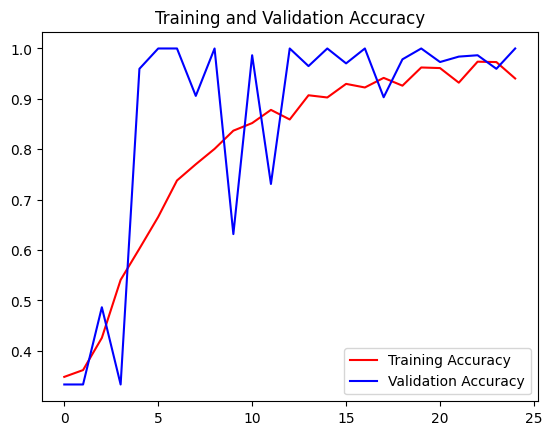

In [11]:
acc = history.history[ "accuracy"]
val_acc = history.history[ "val_accuracy"]

epochs = range( len( acc))

plt.plot( epochs, acc, "r", label="Training Accuracy")
plt.plot( epochs, val_acc, "b", label="Validation Accuracy")
plt.title( "Training and Validation Accuracy")
plt.legend()
plt.show()

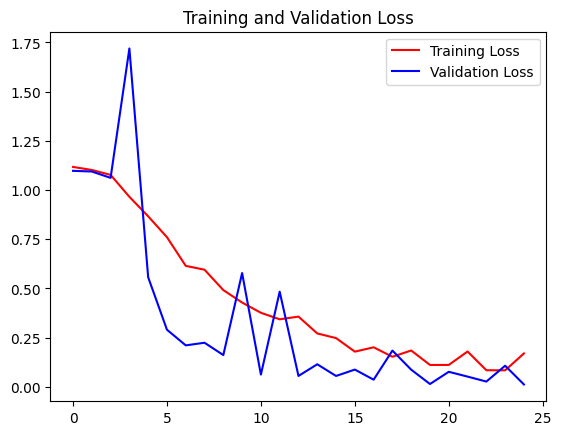

In [12]:
loss = history.history[ "loss"]
val_loss = history.history[ "val_loss"]

epochs = range( len( loss))

plt.plot( epochs, loss, "r", label="Training Loss")
plt.plot( epochs, val_loss, "b", label="Validation Loss")
plt.title( "Training and Validation Loss")
plt.legend()
plt.show()